# Question 3
### 3. What is the association between fruit and vegetable consumption and hypertension awareness among adults in different states of the US?

First we will do a simple EDA to visualize the differences through groups. Then then we will like to see if there is statistical evidence that fruit and vegetable consumption is related to the awareness of hypertension. We will perform a t-student test to compare if the averages are different.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('final_sample.csv')

In [4]:
# Further information about the variables can be found here:
# https://www.cdc.gov/brfss/questionnaires/pdf-ques/2013%20BRFSS_English.pdf

#### There are 2 variables related to Hypertension in our Dataset
### bphigh4: Ever Told Blood Pressure High
### bpmeds: Currently Taking Blood Pressure Medication
hypertension_variables = ['bphigh4', 'bpmeds']

#### And We have 6 variables related to vegetables and fruit consumption
### fruitju1: How Many Times Did You Drink 100 Percent Pure Fruit Juices?
### fruit1: How Many Times Did You Eat Fruit?
### fvbeans: How Many Times Did You Eat Beans Or Lentils?
### fvgreen: How Many Times Did You Eat Dark Green Vegetables?
### fvorang: How Many Times Did You Eat Orange-Colored Vegetables?
### vegetab1: How Many Times Did You Eat Other Vegetables?
frvg_variables = ['fruitju1', 'fruit1', 'fvbeans', 'fvgreen', 'fvorang', 'vegetab1']

bphigh4
No                                            9476
Yes                                           8163
Told borderline or pre-hypertensive            217
Yes, but female told only during pregnancy     102
unknown                                         42
Name: count, dtype: int64


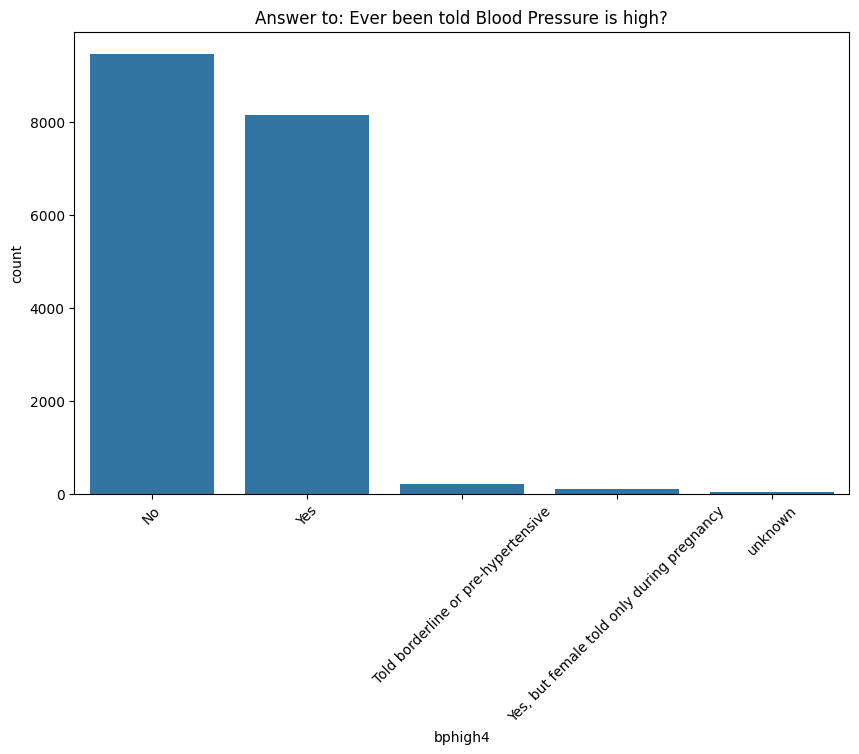

bpmeds
unknown    9849
Yes        6807
No         1344
Name: count, dtype: int64


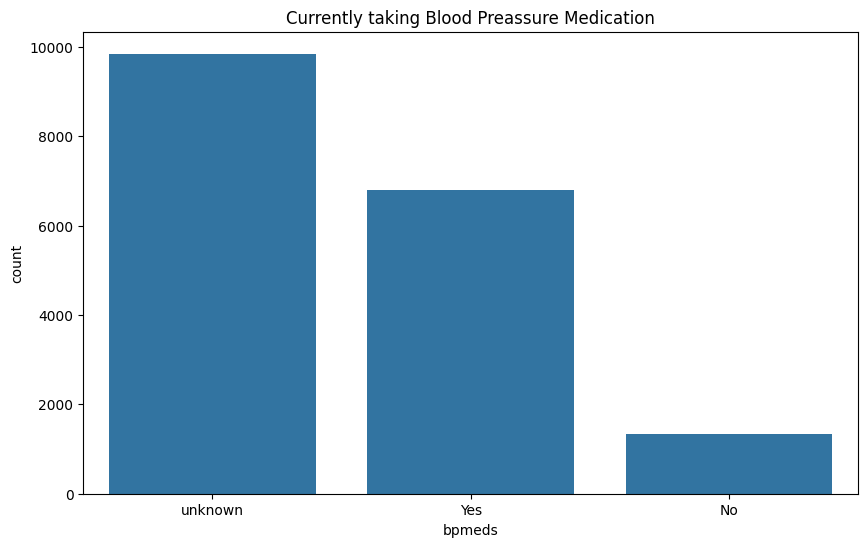

In [5]:
exercise_summary = data['bphigh4'].value_counts()
print(exercise_summary)


# Plot distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='bphigh4')
plt.title(f"Answer to: Ever been told Blood Pressure is high?")
plt.xticks(rotation=45)
plt.show()

exercise_summary = data['bpmeds'].value_counts()
print(exercise_summary)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='bpmeds')
plt.title(f"Currently taking Blood Preassure Medication")
plt.show()

In this case we will use the first variable of the hypertension group to determine if differences arise when comparing different fruit consumptions.
We have not chosen the second variable due to the vast amount of NAs. 

In [6]:
exercise_summary = data['fruit1'].value_counts()
print(exercise_summary)
print(np.unique(data['fruit1']))

fruit1
101.0    4378
102.0    2256
203.0    1108
202.0     945
103.0     841
         ... 
218.0       1
347.0       1
355.0       1
343.0       1
332.0       1
Name: count, Length: 81, dtype: int64
[  0.         101.         102.         103.         104.
 105.         106.         107.         108.         110.
 112.         114.         115.         120.         178.78952391
 201.         202.         203.         204.         205.
 206.         207.         208.         209.         210.
 212.         213.         214.         215.         217.
 218.         220.         221.         225.         228.
 230.         300.         301.         302.         303.
 304.         305.         306.         307.         308.
 309.         310.         311.         312.         313.
 314.         315.         316.         317.         318.
 319.         320.         321.         322.         323.
 324.         325.         326.         327.         328.
 329.         330.         331.        

Here we observe an unsual distribution of a consumption variable. Below we will show a brief explanation and the procedure that we will follow to transform the data for our purpose.

The Categories meaning can be understand through the following schema:

        1 _ _ Per day

        2 _ _ Per week
        
        3 _ _ Per month
        
        5 5 5 Never
        
        7 7 7 Don’t know / Not sure
        
        9 9 9 Refused



In our dataset there are no (555, 777, 999) groups. Although, we find a 0.0 group that we will classify as (Never) taking into account that groups (100, 200, 300) are not represented in our data either.

We will pass all the data to a monthly bases for that we assume that the respondant's consumption is constant or at least representative of the average consumption through time. 

In [7]:
def convert_var_to_monthly(x):
    freq_map = {1: 30, 2: 4, 3: 1, 0: 0}  # daily, weekly, monthly, never
    freq = int(x // 100)  # extract frequency (1st digit)
    amount = int(x % 100)  # extract amount (last 2 digits)
    monthly_amount = amount * freq_map[freq]
    return monthly_amount

data['fruit1_monthly'] = data['fruit1'].apply(convert_var_to_monthly)

In [8]:
monthly_variables = []
for frvg_cat in frvg_variables:
    month_var = frvg_cat + '_monthly'
    data[month_var] = data[frvg_cat].apply(convert_var_to_monthly)
    monthly_variables.append(month_var)

fruitju1_monthly
0      7064
30     3053
4       993
8       798
12      762
2       726
1       591
3       499
5       491
20      472
60      459
960     391
10      361
15      294
16      286
6       143
90      133
28       95
7        91
25       70
120      47
24       39
150      37
14       28
40       11
9        10
180       7
210       6
18        3
13        3
29        3
21        3
31        2
300       2
11        2
32        2
17        2
23        2
22        2
50        2
48        1
84        1
240       1
44        1
930       1
80        1
450       1
99        1
810       1
56        1
27        1
26        1
45        1
540       1
75        1
Name: count, dtype: int64


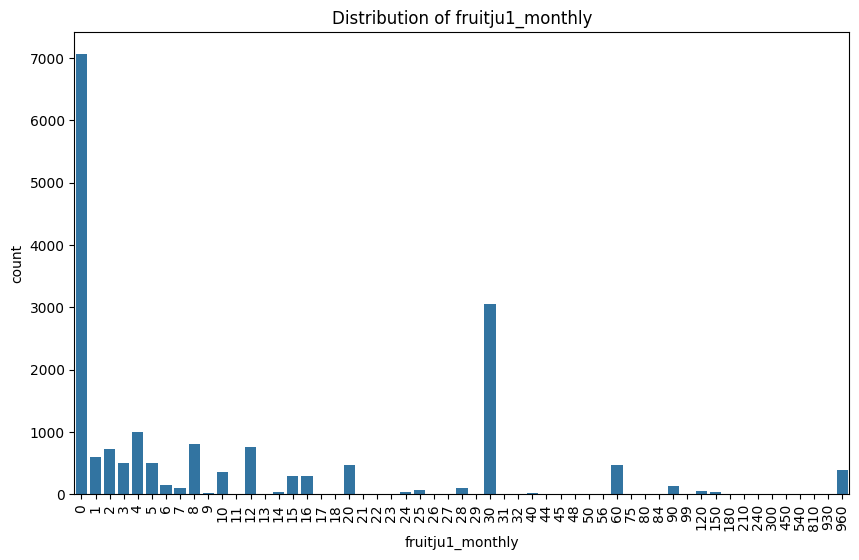

fruit1_monthly
30     4907
60     2286
12     1216
20     1175
8      1041
       ... 
72        1
43        1
55        1
360       1
52        1
Name: count, Length: 66, dtype: int64


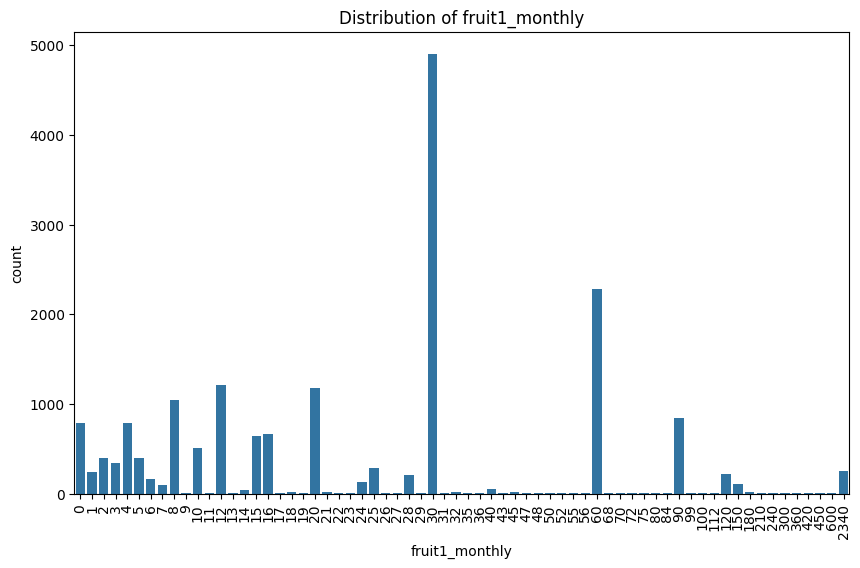

fvbeans_monthly
0      3175
4      2587
8      1895
2      1445
12     1395
1       993
5       935
3       915
30      827
10      790
20      613
15      515
16      475
32      377
6       347
7       218
60      149
25       83
90       50
28       43
24       42
14       31
18       14
120      12
9        11
13       10
21       10
40        8
17        6
11        4
23        4
50        3
150       3
22        2
55        2
45        2
35        1
80        1
240       1
27        1
56        1
19        1
36        1
52        1
29        1
Name: count, dtype: int64


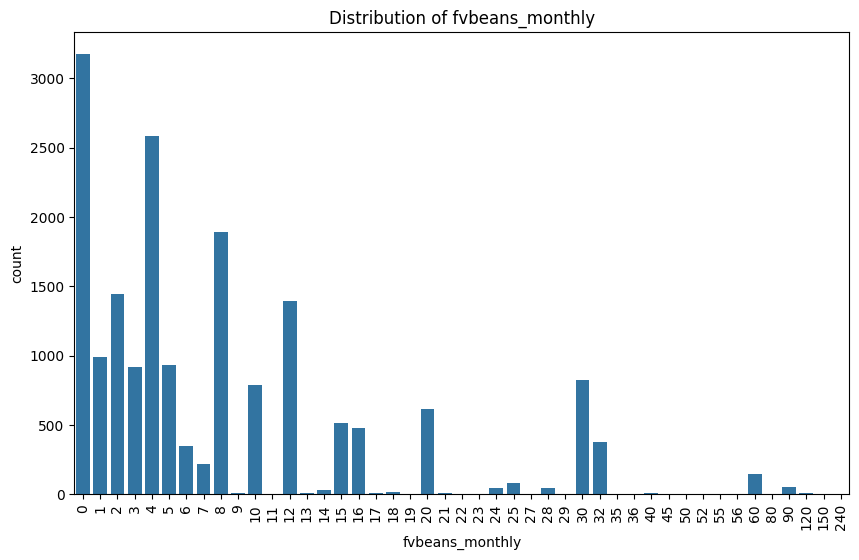

fvgreen_monthly
30     2709
8      1807
12     1717
4      1664
0      1648
20     1459
16      908
15      775
10      767
2       639
60      607
5       600
3       516
1       452
25      334
6       273
32      232
7       168
28      158
24      153
90      118
14       60
120      20
18       19
40       18
21       18
9        17
26       16
22       14
150      14
17       10
11        9
50        9
45        8
48        7
23        7
13        6
27        6
29        4
180       4
31        4
56        4
19        3
210       3
128       2
35        2
112       1
86        1
99        1
84        1
900       1
44        1
55        1
92        1
240       1
70        1
33        1
80        1
Name: count, dtype: int64


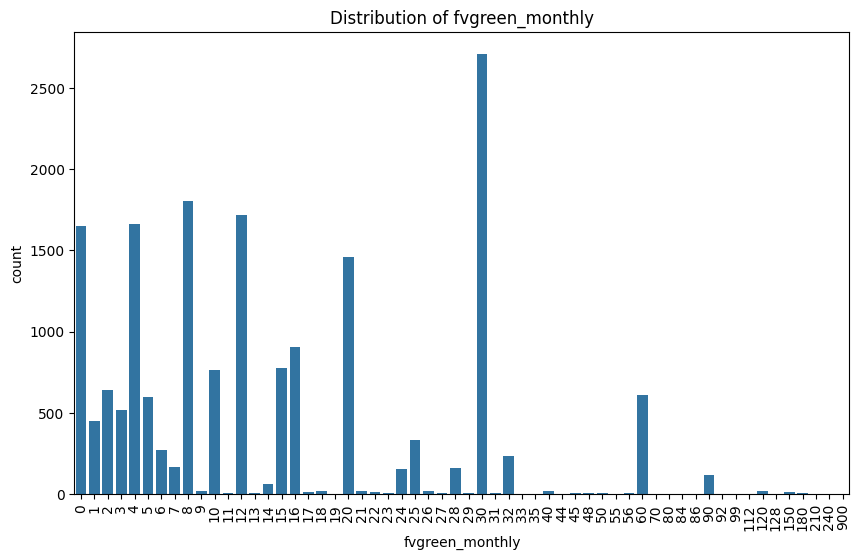

fvorang_monthly
0      2908
4      2803
8      1937
2      1441
12     1285
5      1054
30     1033
1      1027
10      866
3       848
20      592
15      565
16      471
6       285
44      238
7       152
60      138
25       95
28       48
24       44
90       33
14       31
9        18
18       12
120      10
22        8
40        8
150       6
11        6
21        5
17        5
56        3
13        3
23        3
36        2
48        2
180       2
29        2
19        2
26        1
84        1
32        1
100       1
27        1
42        1
450       1
210       1
45        1
Name: count, dtype: int64


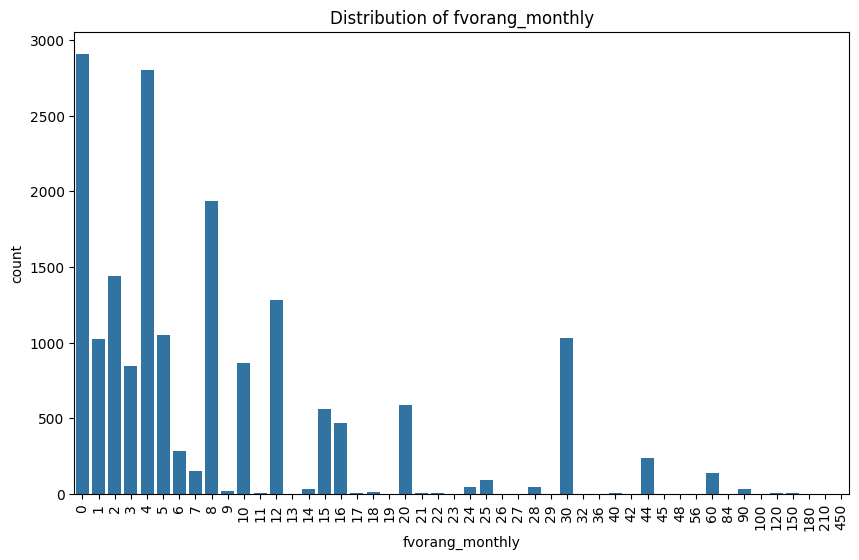

vegetab1_monthly
30     4996
12     1889
20     1773
60     1318
8      1311
16      948
4       910
15      837
10      663
25      475
0       368
5       346
28      331
2       268
3       241
90      234
24      226
6       168
1       156
7       108
40       50
120      46
14       42
150      28
18       28
21       26
9        21
45       20
32       18
13       15
22       15
27       12
50       11
29       11
17       11
31       10
35        9
56        8
23        7
26        7
11        6
75        5
210       4
84        4
48        4
80        3
180       3
99        2
360       1
750       1
300       1
38        1
70        1
68        1
36        1
92        1
Name: count, dtype: int64


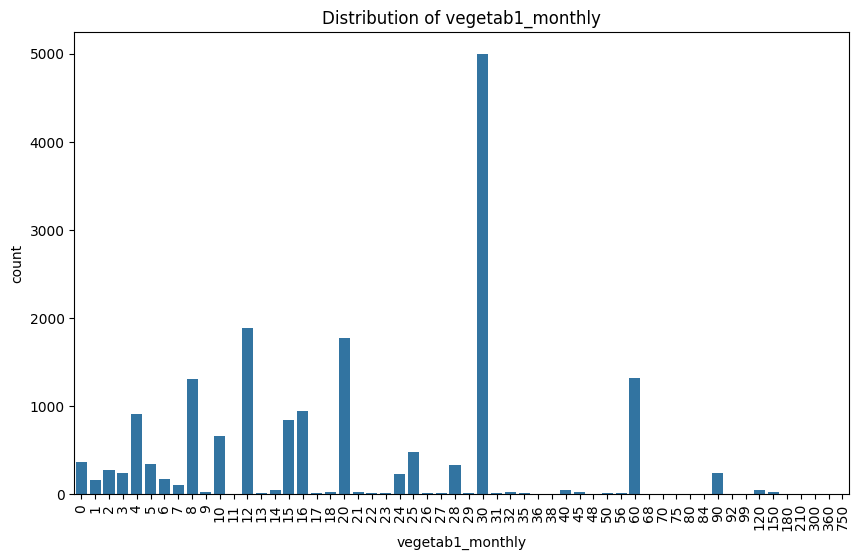

In [9]:
for frvg_cat in monthly_variables:
    exercise_summary = data[frvg_cat].value_counts()
    print(exercise_summary)


    # Plot distribution of categories
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=frvg_cat)
    plt.title(f"Distribution of {frvg_cat}")
    plt.xticks(rotation=90)
    plt.show()

### Correlation

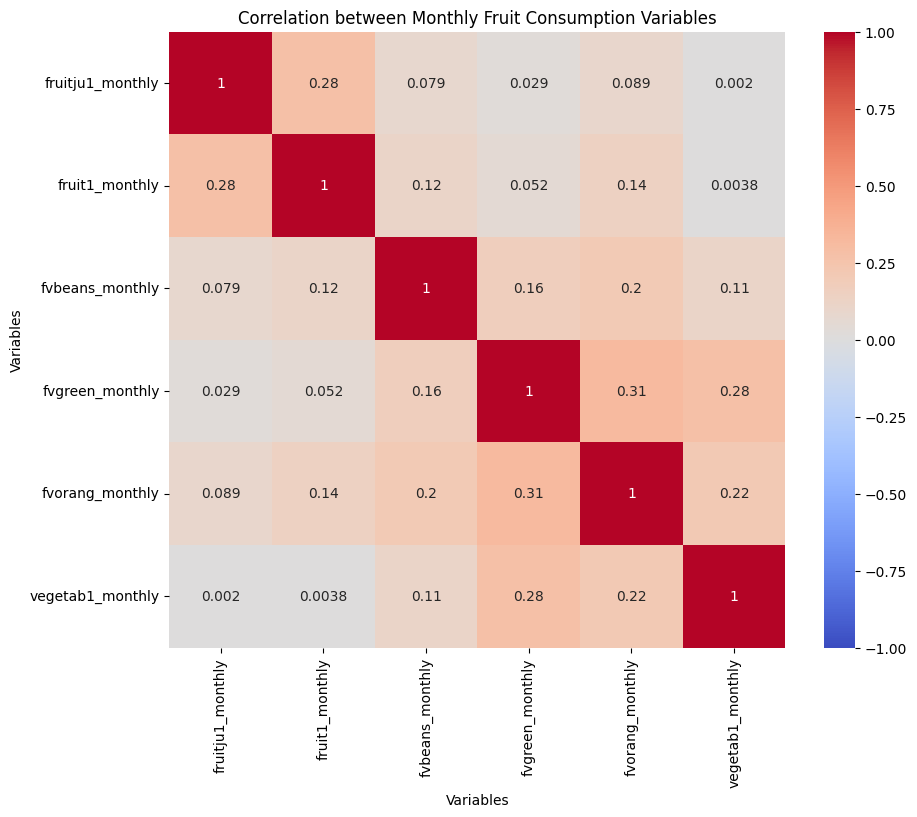

In [10]:
corr_matrix = data[monthly_variables].corr()

# create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation between Monthly Fruit Consumption Variables')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.show()

The correlation between the different fruit and vegetable consumptions variables is always positve. Being 0.31 The higher correlation value between two variables.

We are going to join the 6 variables in 3 groups (Fruits, Beans, Vegetables) by summing them.

In [11]:
frvg_final_set = ['fruit_consumption', 'bean_consumption', 'vegetable_consumption']

data['fruit_consumption'] = data['fruitju1_monthly'] + data['fruit1_monthly']
data['bean_consumption'] = data['fvbeans_monthly']
data['vegetable_consumption'] = data['fvgreen_monthly'] + data['fvorang_monthly'] + data['vegetab1_monthly']

fruit_consumption
60      2106
30      1980
90       960
20       737
12       616
        ... 
1040       1
2355       1
145        1
183        1
174        1
Name: count, Length: 212, dtype: int64


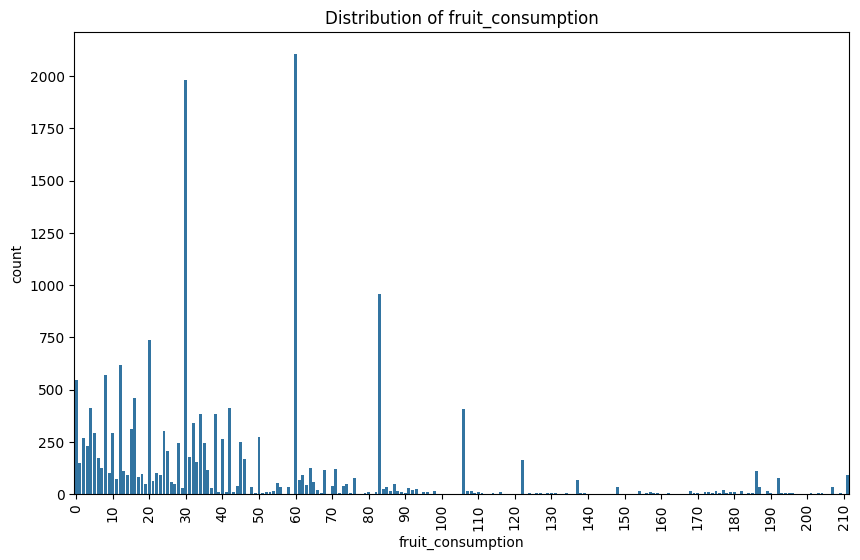

bean_consumption
0      3175
4      2587
8      1895
2      1445
12     1395
1       993
5       935
3       915
30      827
10      790
20      613
15      515
16      475
32      377
6       347
7       218
60      149
25       83
90       50
28       43
24       42
14       31
18       14
120      12
9        11
13       10
21       10
40        8
17        6
11        4
23        4
50        3
150       3
22        2
55        2
45        2
35        1
80        1
240       1
27        1
56        1
19        1
36        1
52        1
29        1
Name: count, dtype: int64


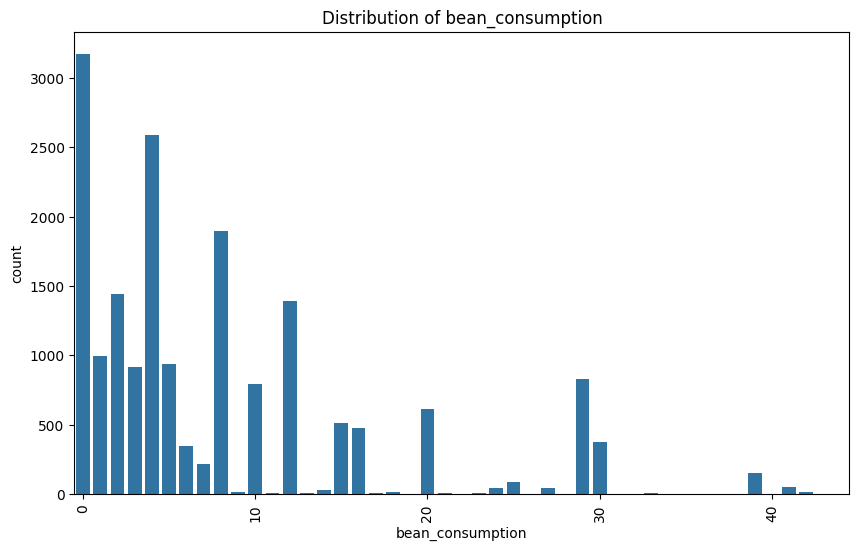

vegetable_consumption
40     605
50     568
36     520
32     515
20     514
      ... 
149      1
141      1
224      1
276      1
300      1
Name: count, Length: 204, dtype: int64


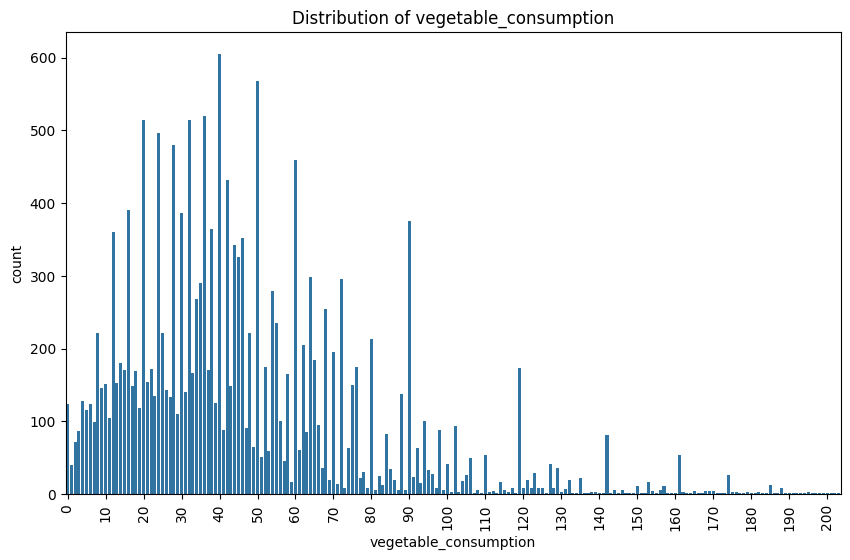

In [12]:
for frvg_cat in frvg_final_set:
    exercise_summary = data[frvg_cat].value_counts()
    print(exercise_summary)


    # Plot distribution of categories
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=frvg_cat)
    plt.title(f"Distribution of {frvg_cat}")

    plt.xticks(rotation=90)
    # Show only every 10th label on the x-axis
    xticks = plt.gca().get_xticks()
    plt.gca().set_xticks(xticks[::10])
    plt.gca().set_xticklabels(xticks[::10])


    plt.show()

Now for each variable we will create a 3 subgroups (Low: No or little consumption, Medium, High)

In [13]:
data['fruit_consumption_cat'] = pd.cut(data['fruit_consumption'], bins=[-np.inf, 29, 59, np.inf], labels=['low','medium', 'high'])
data['fruit_consumption_cat'].value_counts()
# Low -> Consumes fruit less than once a day
# Medium -> Consumes fruit less than twice a week


fruit_consumption_cat
low       6925
high      5640
medium    5435
Name: count, dtype: int64

In [14]:
data['bean_consumption_cat'] = pd.cut(data['bean_consumption'], bins=[-np.inf, 3, np.inf], labels=['low','others'])
data['bean_consumption_cat'].value_counts()
# Low -> consumes beans less than once a week

bean_consumption_cat
others    11472
low        6528
Name: count, dtype: int64

In [15]:
data['vegetable_consumption_cat'] = pd.cut(data['vegetable_consumption'], bins=[-np.inf, 29, 59, np.inf], labels=['low','medium', 'high'])
data['vegetable_consumption_cat'].value_counts()
# Low -> Consumes fruit less than once a day
# Medium -> Consumes fruit less than twice a week

vegetable_consumption_cat
medium    7313
low       5663
high      5024
Name: count, dtype: int64

## **Fruit Consumption**

Compute Averages

In [16]:
data_fruit_experiment = data[['fruit_consumption_cat', 'bphigh4']].copy()

data_fruit_experiment.head()

,fruit_consumption_cat,bphigh4
0,medium,No
1,medium,No
2,high,No
3,high,No
4,high,No


In [17]:
data_fruit_experiment['high_blood_pressure'] = [0 if s == 'No' else 1 for s in data_fruit_experiment['bphigh4']]
data_fruit_experiment = data_fruit_experiment.drop('bphigh4', axis = 1)
data_fruit_experiment

,fruit_consumption_cat,high_blood_pressure
0,medium,0
1,medium,0
2,high,0
3,high,0
4,high,0
...,...,...
17995,high,1
17996,high,1
17997,high,0
17998,low,0


In [18]:
col_counts = data['fruit_consumption_cat'].value_counts()
col_counts


fruit_consumption_cat
low       6925
high      5640
medium    5435
Name: count, dtype: int64

### Populations

In [19]:
result = data_fruit_experiment.groupby(by = ['fruit_consumption_cat']).sum()
result['high_blood_pressure'] = result['high_blood_pressure']/col_counts
result

C:\Users\jesus\AppData\Local\Temp\ipykernel_4540\21084195.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data_fruit_experiment.groupby(by = ['fruit_consumption_cat']).sum()


,high_blood_pressure
fruit_consumption_cat,
low,0.488809
medium,0.469733
high,0.458511


CI - 95%

In [20]:
# We will get a 95% interval for each group population
# CI(95%) = z * SEp
# SEp = sqrt(p*(1-p)/n)
z = 1.96
sep_bp = []
populations = result['high_blood_pressure'].values
population_sizes = col_counts.values 


for i in range(len(populations)):
    population = populations[i]
    n = population_sizes[i]
    sep_bp.append(np.sqrt(population*(1-population)/n))

result['sep'] = sep_bp

In [21]:
result['min'] = result['high_blood_pressure'] - z*result['sep']
result['max'] = result['high_blood_pressure'] + z*result['sep']
result


,high_blood_pressure,sep,min,max
fruit_consumption_cat,,,,
low,0.488809,0.006007,0.477035,0.500582
medium,0.469733,0.006646,0.456708,0.482759
high,0.458511,0.006759,0.445263,0.471758


Following this approach we can't say that there is a relation with 95% confidence.

Although this approach has a clear bias and that is the selection of groups by fruit consumption. 

In [22]:
hypertension_fruit_experiment = data[['bphigh4', 'fruit_consumption']].copy()
result = hypertension_fruit_experiment.groupby(by=['bphigh4']).agg(['mean','std']).rename(columns={'mean':'mean_value','std':'std_dev'}).iloc[[0,2]]
print(data['bphigh4'].value_counts())
result

bphigh4
No                                            9476
Yes                                           8163
Told borderline or pre-hypertensive            217
Yes, but female told only during pregnancy     102
unknown                                         42
Name: count, dtype: int64


fruit_consumption            
               mean_value     std_dev
bphigh4                              
No              89.283981  317.175489
Yes             96.439177  355.167844

### Complementary Study


Let's test if the mean consumption of fruit of the people that have been told to have high blood pressure is not the same as those who have not been told. 

𝑥h − 𝑥nh ~ 𝑁 (𝜇h − 𝜇nh, 𝑆𝐸)

h -> have been toldhigh blood pressure.

nh -> not have been told.

In [23]:
mean_no = result.values[1][0]
mean_yes = result.values[0][0]

diff = mean_no - mean_yes
diff

7.155196190720872

In [24]:
n_no = data['bphigh4'].value_counts().iloc[0]
sd_no = result.values[0][1]

n_yes = data['bphigh4'].value_counts().iloc[1]
sd_yes = result.values[1][1]


se = np.sqrt( sd_no*sd_no/n_no + sd_yes*sd_yes/n_yes)
se

5.105829106946296

If they were the same we will have:

N(0, 5.11)

In [25]:
z_score = diff/se
z_score

𝑃(𝑧 > 𝑥)

In [26]:
import scipy.stats as stats


alpha = 0.05

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test


# Results
print("Z-score:", z_score)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the sample mean and the population mean.")

Z-score: 1.4013779233203254
P-value: 0.1611010904057677
Fail to reject the null hypothesis. There is no significant difference between the sample mean and the population mean.


The p-value is quite high and we can't be sure that the means are actually different

### Complementary study to the Complementaty Study

We have enough samples to apply the CLT, however we have been through the general EDA and the one in this question that there are sometimes outliers and those outliers sometimes are unresonable for the measure, like the 4000 thousands hours of sleep. That is not related to all samples but is enough to make us belief the proccess was not perfect.

Below we propose a new approach given that the variance might not be as reliable if there have been extreme errors. 

Are the mean consumption of fruit the same for both groups
by T-student

𝑝𝑜𝑖𝑛𝑡 𝑒𝑠𝑡𝑖𝑚𝑎𝑡𝑒 ± 𝑚𝑎𝑟𝑔𝑖𝑛 𝑜𝑓 𝑒𝑟𝑟𝑜𝑟

(𝑥1 − 𝑥2) ± 𝑡𝑑𝑓
∗ ⋅ 𝑆𝐸_(𝑥1− 𝑥2)

In [27]:
t_df = 1.660  # More of 100 degrees of freedom with 95 % confidence
min_ci = diff - t_df*se
max_ci = diff + t_df*se
print(f'The CI 95% confidence is ({min_ci}, {max_ci})')

The CI 95% confidence is (-1.3204801268099793, 15.630872508251723)


In [28]:
# CI 90% confidence
t_df = 1.290
min_ci = diff - t_df*se
max_ci = diff + t_df*se
print(f'The CI 90% confidence is ({min_ci}, {max_ci})')

The CI 90% confidence is (0.56867664276015, 13.741715738681595)


Dispite what we usually see we have higher confidence t-student that with the normal distribution. The t-student does not depend on the variance.

Here we could say both means are different with a 90% confidence. However, following the general significance of 95% and due to the differences in both distributions we will not accept the alternative hypothesis.

We will state that the fruit consumption is the same for those who have been told that their blood pressure is high and those who have not. 

## **Vegetable Consumption**

In [31]:
data_vegetable_experiment = data[['vegetable_consumption_cat', 'bphigh4']].copy()
data_vegetable_experiment['high_blood_pressure'] = [0 if s == 'No' else 1 for s in data_vegetable_experiment['bphigh4']]
data_vegetable_experiment = data_vegetable_experiment.drop('bphigh4', axis = 1)

In [32]:
col_counts = data['vegetable_consumption_cat'].value_counts()
result = data_vegetable_experiment.groupby(by = ['vegetable_consumption_cat']).sum()
result['high_blood_pressure'] = result['high_blood_pressure']/col_counts

# We will get a 95% interval for each group population
# CI(95%) = z * SEp
# SEp = sqrt(p*(1-p)/n)
z = 1.96
sep_bp = []
populations = result['high_blood_pressure'].values
population_sizes = col_counts.values 


for i in range(len(populations)):
    population = populations[i]
    n = population_sizes[i]
    sep_bp.append(np.sqrt(population*(1-population)/n))

result['sep'] = sep_bp

result['min'] = result['high_blood_pressure'] - z*result['sep']
result['max'] = result['high_blood_pressure'] + z*result['sep']
result

C:\Users\jesus\AppData\Local\Temp\ipykernel_4540\2844688972.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data_vegetable_experiment.groupby(by = ['vegetable_consumption_cat']).sum()


,high_blood_pressure,sep,min,max
vegetable_consumption_cat,,,,
low,0.494261,0.005846,0.482802,0.505720
medium,0.478326,0.006638,0.465316,0.491337
high,0.443272,0.007009,0.429535,0.457009


Here we see that the last interval is different from the other two with a confidence of 95%.

This means that for our dataset the mean of people that have been warned about high blood pressure is lower for people that eat 2 or more vegetables a day than those who eat less. 

In [33]:
hypertension_vegetable_experiment = data[['bphigh4', 'vegetable_consumption']].copy()
result = hypertension_vegetable_experiment.groupby(by=['bphigh4']).agg(['mean','std']).rename(columns={'mean':'mean_value','std':'std_dev'}).iloc[[0,2]]
print(data['bphigh4'].value_counts())


mean_no = result.values[1][0]
mean_yes = result.values[0][0]

diff = mean_no - mean_yes
n_no = data['bphigh4'].value_counts().iloc[0]
sd_no = result.values[0][1]

n_yes = data['bphigh4'].value_counts().iloc[1]
sd_yes = result.values[1][1]


se = np.sqrt( sd_no*sd_no/n_no + sd_yes*sd_yes/n_yes)

print(f'The difference between the means is: {diff}')
print(f'The se between the means is: {se}')


bphigh4
No                                            9476
Yes                                           8163
Told borderline or pre-hypertensive            217
Yes, but female told only during pregnancy     102
unknown                                         42
Name: count, dtype: int64
The difference between the means is: -3.7732062823806203
The se between the means is: 0.5239045431405233


In [34]:
## Hypotheseis - Normal Distribution

z_score = diff/se

import scipy.stats as stats


alpha = 0.05

p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))  # Two-tailed test


# Results
print("Z-score:", z_score)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the sample mean and the population mean.")

Z-score: -7.202087349276067
P-value: 5.930811397547586e-13
Reject the null hypothesis. The sample mean is significantly different from the population mean.


In [35]:
## Hypothesis - T student Distribution

t_df = 1.660  # More of 100 degrees of freedom with 95 % confidence
min_ci = diff - t_df*se
max_ci = diff + t_df*se
print(f'The CI 95% confidence is ({min_ci}, {max_ci})')


# CI 90% confidence
t_df = 1.290
min_ci = diff - t_df*se
max_ci = diff + t_df*se
print(f'The CI 90% confidence is ({min_ci}, {max_ci})')

The CI 95% confidence is (-4.642887823993889, -2.9035247407673515)
The CI 90% confidence is (-4.449043143031895, -3.0973694217293453)


In the case of the normal distribution we see that the p_value is extremely low.

As well, for the t-student distribution we see that the confidence interval is not close to zero either for 90% and 95% confidence intervals. 

All in all, with the data provided we can state that vegetable consumption is related with not being warned of high blood pressure which here we consider that is quite related to not having high blood pressure. 

## Limitations & Conclussions

We have doubts about the reilability of the data due to some unresonable measures we have found. 

There is the possibility that timeline is affecting the conclusion, we are not taking into account if fruit consumption is greater after being told about blood pressure than before that as there might be some correlation between those events. Although our study is an interesting first approach that does not garanty the relation between these two means, data should be collected for the specific study as timelines can be misleading. 

**However, based on the data we can not relate fruit consumption as a metric of not high blood levels.**


Nevertheless, based on the statistical inference done with the vegetable consumption, **we do find with high confidence that vegetable consumption is related with no high blood pressure levels.**

